In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("test_scores.csv") 
df

school school_setting school_type classroom teaching_method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard       20.0   
1     ANKYI          Urban  Non-public       6OL        Standard       20.0   
2     ANKYI          Urban  Non-public       6OL        Standard       20.0   
3     ANKYI          Urban  Non-public       6OL        Standard       20.0   
4     ANKYI          Urban  Non-public       6OL        Standard       20.0   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2130  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2131  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2132  ZOWMK          Urban      Public       ZBH        Standard       30.0   

     student_id  gender                             lunch  pretest  posttest  
0         2FHT3  Female                  Does not qualify     62.0      72.0  
1         3JIVH  Female                  Does not qualify     66.0      79.0  
2         3XOWE    Male                  Does not qualify     64.0      76.0  
3         556O0  Female                  Does not qualify     61.0      77.0  
4         74LOE    Male                  Does not qualify     64.0      76.0  
...         ...     ...                               ...      ...       ...  
2128      T8LSK  Female                  Does not qualify     39.0      55.0  
2129      VNP26  Female  Qualifies for reduced/free lunch     38.0      46.0  
2130      YDR1Z  Female  Qualifies for reduced/free lunch     45.0      51.0  
2131      YUEIH    Male  Qualifies for reduced/free lunch     46.0      53.0  
2132      ZVCQ8    Male  Qualifies for reduced/free lunch     41.0      48.0  

[2133 rows x 11 columns]

In [4]:

school_setting = df.groupby('school_setting')
rural_pretest = school_setting.get_group('Rural')['pretest']
print(rural_pretest)

453     53.0
454     63.0
455     67.0
456     61.0
457     57.0
        ... 
1828    44.0
1829    38.0
1830    42.0
1831    42.0
1832    46.0
Name: pretest, Length: 510, dtype: float64


In [5]:
medians = df.groupby('school_setting').median()
#medians['n_student']
medians

n_student  pretest  posttest
school_setting                              
Rural                20.0     53.0      67.0
Suburban             21.0     64.0      76.0
Urban                26.0     48.0      59.0

In [6]:
means = df.groupby('school_setting').mean()
means

n_student    pretest   posttest
school_setting                                 
Rural           20.015686  51.490196  64.050980
Suburban        21.683403  63.841004  76.037657
Urban           25.242826  49.875276  61.748344

[53.0, 64.0, 48.0]


Text(0.5, 1.0, 'School settings vs pretest scores')

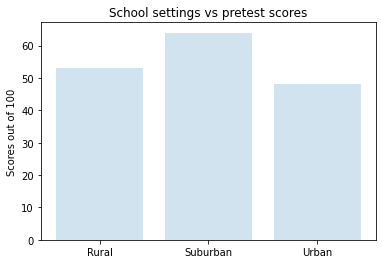

In [7]:
# bar graph of school settings and pretest scores

objects = ['Rural', 'Suburban', 'Urban']

median_values = medians.iloc[0:]['pretest']
median_performances = []
for value in median_values:
    #print(value)
    median_performances.append(value)
    #print(type(value))

print(median_performances)

plt.bar(objects, median_performances, align='center', alpha=0.2)
plt.ylabel('Scores out of 100')
plt.title('School settings vs pretest scores')

[51.490196078431374, 63.84100418410042, 49.875275938189844]


Text(0.5, 1.0, 'School settings vs posttest scores')

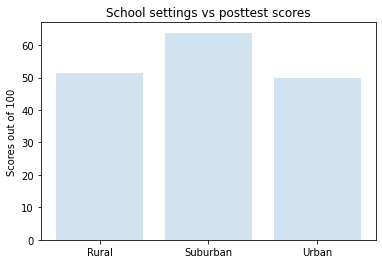

In [8]:
mean_values = means.iloc[0:]['pretest']
mean_performances = []
for value in mean_values:
    #print(value)
    mean_performances.append(value)

print(mean_performances)
plt.bar(objects, mean_performances, align='center', alpha=0.2)
plt.ylabel('Scores out of 100')
plt.title('School settings vs posttest scores')

[Text(0.5, 1.0, 'Pretest Scores by School Setting')]

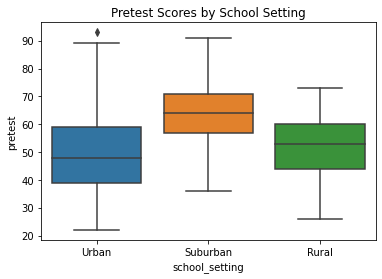

In [9]:
#make a boxplot for pretests
#school_setting = sns.load_dataset(d)
#print(df['school_setting'])

sns.boxplot(x = df['school_setting'], y = df['pretest']).set(title = 'Pretest Scores by School Setting')

[Text(0.5, 1.0, 'Posttest Scores by School Setting')]

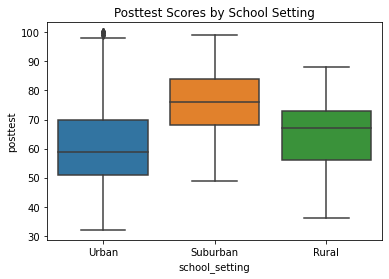

In [10]:
sns.boxplot(x = df['school_setting'], y = df['posttest']).set(title = 'Posttest Scores by School Setting')

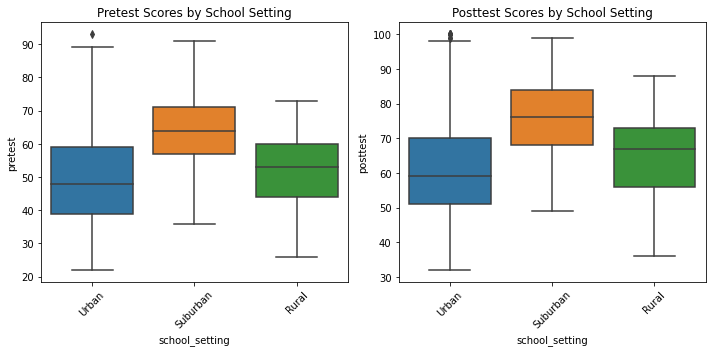

In [14]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)
pretest = sns.boxplot(x=df['school_setting'], y= df['pretest'], ax = axes[0])
plt.setp(pretest.get_xticklabels(), rotation=45)
pretest.set_title('Pretest Scores by School Setting')

posttest = sns.boxplot(x=df['school_setting'], y= df['posttest'], ax = axes[1])
plt.setp(posttest.get_xticklabels(), rotation=45)
posttest.set_title('Posttest Scores by School Setting')

plt.show()